# A Numpy Neural Network  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

In [2]:
# whole data size
N = 100000
# n: the batch size
# d_in: the number of features
# d_1: the dimension of the first hidden layer
# d_2: the dimension of the second hidden layer
# d_out: the dimension of the third hidden layer or the number of outputs
n, d_in, d_1, d_2, d_out = 32, 50, 25, 25, 10

# First, the input data and the output data are completely random. There is no relation between them.
# sampler from the uniform distribution on [0,1)
rng = np.random.default_rng(seed=6274)
# input train data sampled from the uniform distribution on [-0.5, 0.5)
X_all = rng.random(size=(N, d_in))+(-0.5)
# output train data  sampled from the uniform distribution on [-0.5, 0.5)
rng = np.random.default_rng(seed=943)
Y_all = rng.random(size=(N, d_out))+(-0.5)

# the whole data is separated into the training and test parts
train_test_split_ratio = 0.20
X, X_test, Y, Y_test =train_test_split(X_all, Y_all, test_size=train_test_split_ratio, random_state=3487)

# the learning rate
lr = 1.0e-3

# the number of epochs used to observe the route of the training process
epochs = 150

In [3]:
# the function which trains the neural network model
def train_model(X, Y):

    # the number forlds used in the cross validation
    n_folds = 5
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=78243)

    # for each fold a model is trained.
    fold = 0
    for train_index, validation_index in kf.split(X):
        # train data and validation data is determined for the fold
        X_train, X_validate = X[train_index], X[validation_index]
        Y_train, Y_validate = Y[train_index], Y[validation_index]
    
        # for each fold, the model is set to a random initial state
        # initialization of the weight matrix of the first hidden layer
        rng = np.random.default_rng(seed=9348)
        w_1 = rng.random(size=(d_in, d_1))+(-0.5)
        # initialization of the bias matrix of the first hidden layer
        b_1 = 0.1*np.ones(shape=(1, d_1))
        # initialization of the weight matrix of the second hidden layer
        rng = np.random.default_rng(seed=39048)
        w_2 = rng.random(size=(d_1, d_2))+(-0.5)
        # initialization of the bias matrix of the second hidden layer
        b_2 = 0.1*np.ones(shape=(1, d_2))
        # initialization of the weight matrix of the third hidden layer
        rng = np.random.default_rng(seed=578402)
        w_3 = rng.random(size=(d_2, d_out))+(-0.5)
        # initialization of the bias matrix of the third hidden layer
        b_3 = 0.1*np.ones(shape=(1, d_out))
    
        # the number of update steps for each epoch
        num_of_steps = X_train.shape[0] // n
        # arrays to keep the loss information
        loss_array = -np.ones((epochs, num_of_steps))
        epoch_train_loss = -np.ones(epochs)
        epoch_validation_loss = -np.ones(epochs)
    
    
        for k in range(0, epochs):
            for i in range(0, num_of_steps):
                # the batches of input and output data are obtained.
                x = X_train[(i*n):((i+1)*n), :]
                y = Y_train[(i*n):((i+1)*n), :]
    
                # the output of the first hidden layer
                h_1 = np.matmul(x, w_1)+np.matmul(np.ones(shape=(n, 1)), b_1)
                # relu of h_1
                h_1_relu = np.maximum(h_1, 0)
                # the output of the second hidden layer
                h_2 = np.matmul(h_1_relu, w_2)+np.matmul(np.ones(shape=(n, 1)), b_2)
                # relu of h_2
                h_2_relu = np.maximum(h_2, 0)
                # predicted output
                y_pred = np.matmul(h_2_relu, w_3)+np.matmul(np.ones(shape=(n, 1)), b_3)
            
                # root mean squared loss
                loss = np.sqrt(np.square(y_pred-y).mean())
                loss_array[k, i] = loss
            
                # first needed array
                array_needed_1 = 2.0*(y_pred-y)
    
                # gradient of the loss w.r.t. b_3
                grad_b_3 = array_needed_1.sum(axis=0)
            
                # gradient of the loss w.r.t. w_3
                grad_w_3 = np.matmul(h_2_relu.T, array_needed_1)
            
                # derivative of h_2_relu(x), 0 for negative x, 1 for non-negative x
                A = np.ones(shape=h_2.shape)
                the_filter = h_2 < 0
                A[the_filter] = 0
            
                # second needed array
                array_needed_2 = A*(np.matmul(array_needed_1, w_3.T))
        
                # gradient of the loss w.r.t. b_2
                grad_b_2 = array_needed_2.sum(axis=0)
            
                # gradient of the loss w.r.t. w_2
                grad_w_2 = np.matmul(h_1_relu.T, array_needed_2)
            
                # derivative of h_1_relu(x), 0 for negative x, 1 for non-negative x
                C = np.ones(shape=h_1.shape)
                the_filter = h_1 < 0
                C[the_filter] = 0
            
                # third needed array
                array_needed_3 = C*(np.matmul(array_needed_2, w_2.T))
            
                # gradient of the loss w.r.t. b_1
                grad_b_1 = array_needed_3.sum(axis=0)
            
                # gradient of the loss w.r.t. w_1
                grad_w_1 = np.matmul(x.T, array_needed_3)
            
                # gradient updates are applied to the parameters
                b_3 -= lr * grad_b_3
                w_3 -= lr * grad_w_3
                b_2 -= lr * grad_b_2
                w_2 -= lr * grad_w_2
                b_1 -= lr * grad_b_1
                w_1 -= lr * grad_w_1
        
            epoch_train_loss[k] = loss

            # validation of the model is performed
            validation_num_samples = X_validate.shape[0]
            # the output of the first hidden layer
            h_1 = np.matmul(X_validate, w_1)+np.matmul(np.ones(shape=(validation_num_samples, 1)), b_1)
            # relu of h_1
            h_1_relu = np.maximum(h_1, 0)
            # the output of the second hidden layer
            h_2 = np.matmul(h_1_relu, w_2)+np.matmul(np.ones(shape=(validation_num_samples, 1)), b_2)
            # relu of h_2
            h_2_relu = np.maximum(h_2, 0)
            # predicted output
            y_pred = np.matmul(h_2_relu, w_3)+np.matmul(np.ones(shape=(validation_num_samples, 1)), b_3)
            
            # root mean squared squared loss for the validation
            loss = np.sqrt(np.square(y_pred-Y_validate).mean())
            epoch_validation_loss[k] = loss
        
        # the rmse is plotted for the first epoch to have an idea of its variation with respect to each update
        fig, ax = plt.subplots(figsize=(12.8, 9.6))
        _ = ax.plot(loss_array[0,:])
        _ = ax.set_title('train rmse versus update step in the first epoch, fold ' + repr(fold+1))
        _ = ax.set_xlabel('update step number')
        _ = ax.set_ylabel('rmse')
        
        # the rmse is poltted with respect to each epoch for both the training and validation data. This plot is used for
        # determining the optimum number of epochs. By this way, both underfitting and overfitting are avoided.
        fig, ax = plt.subplots(figsize=(12.8, 9.6))
        _ = ax.plot(epoch_train_loss, label='train rmse')
        _ = ax.plot(epoch_validation_loss, label='valdation rmse')
        handles, labels = ax.get_legend_handles_labels()
        _ = ax.legend(handles, labels)
        _ = ax.set_title('rmse versus epoch number , fold ' + repr(fold+1))
        _ = ax.set_xlabel('epoch number')
        _ = ax.set_ylabel('rmse')
        
        # fold number is printed to have an idea of the state of the training process.
        print('fold:', fold + 1)
        fold = fold + 1

fold: 1
fold: 2
fold: 3
fold: 4
fold: 5


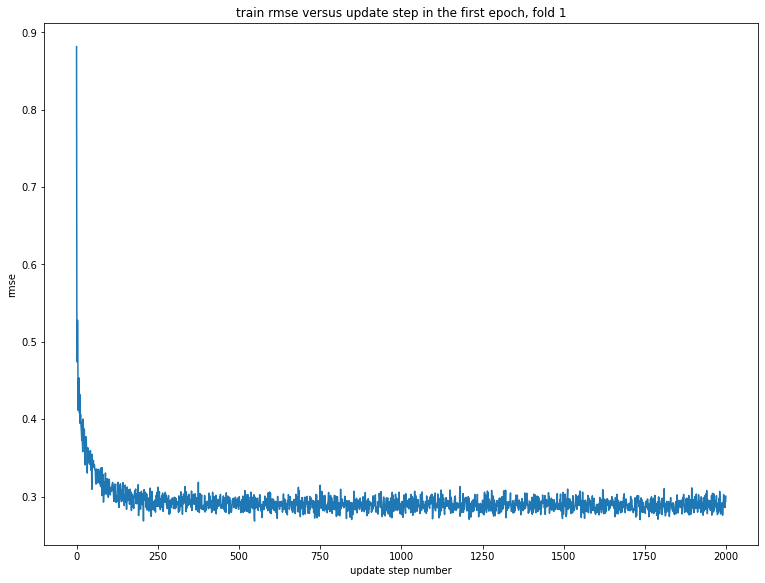

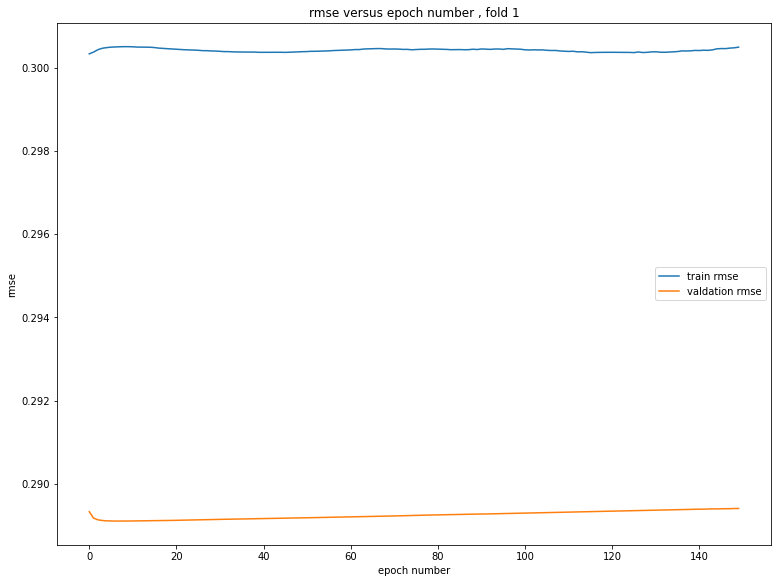

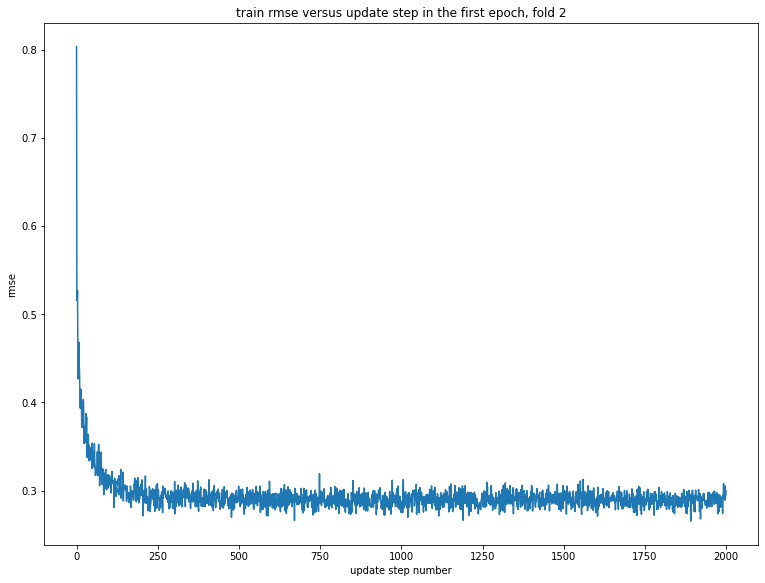

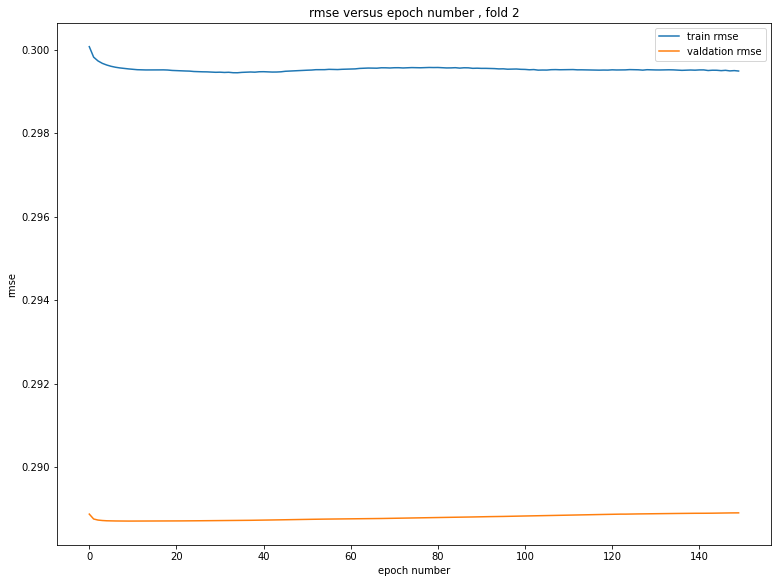

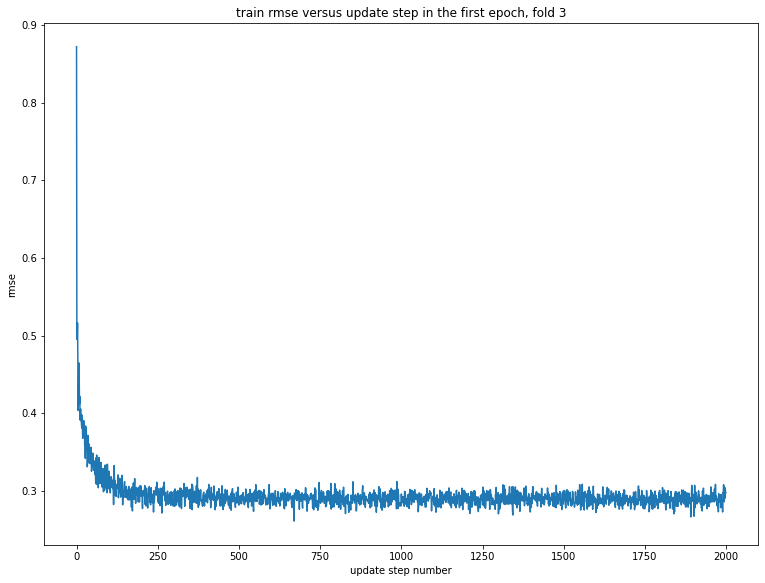

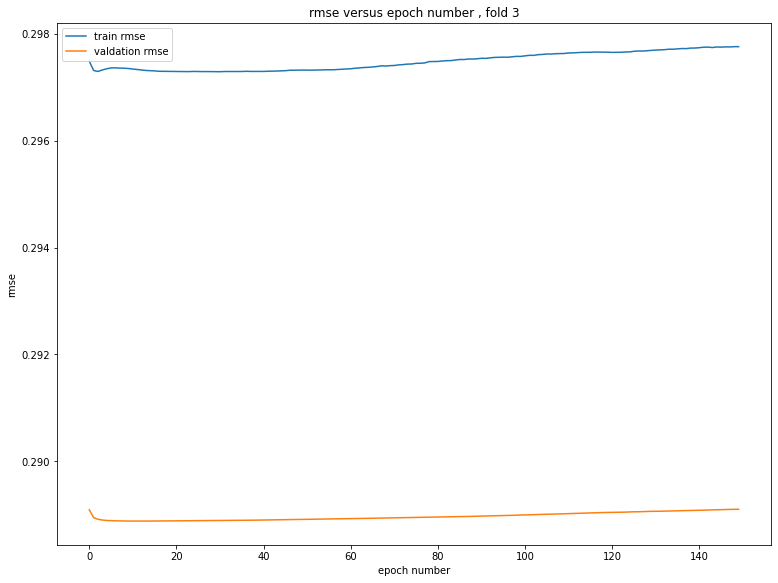

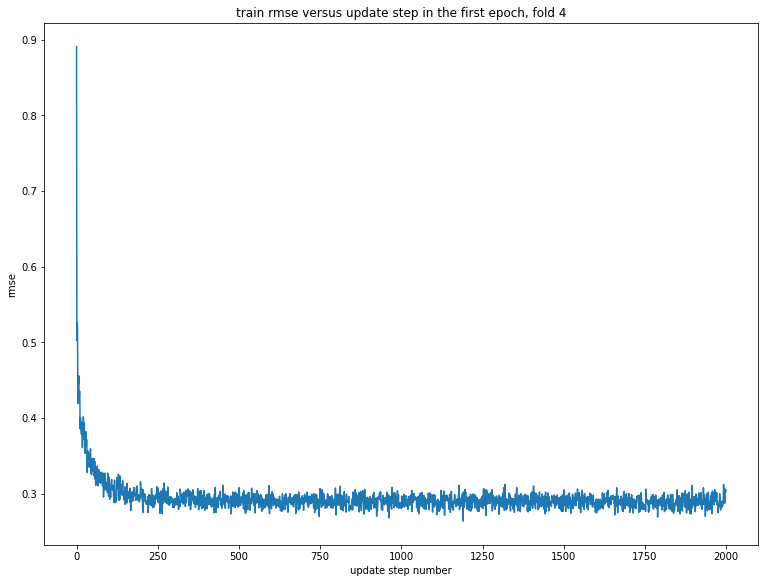

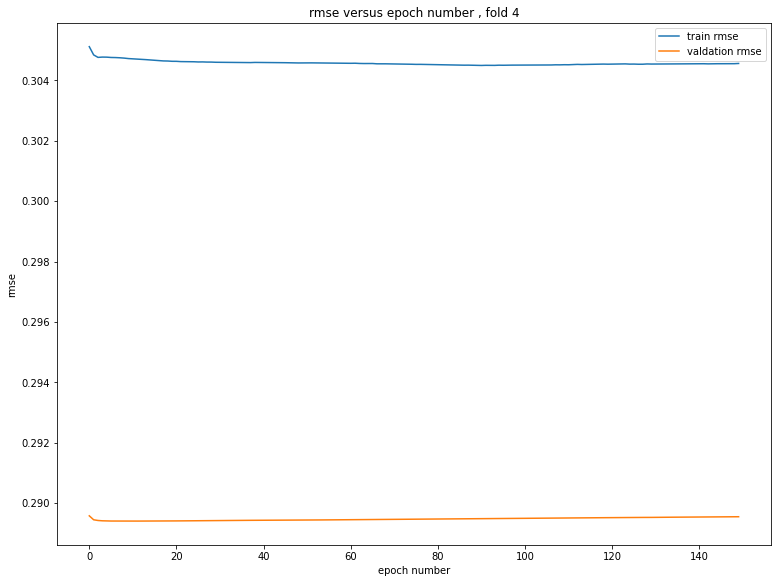

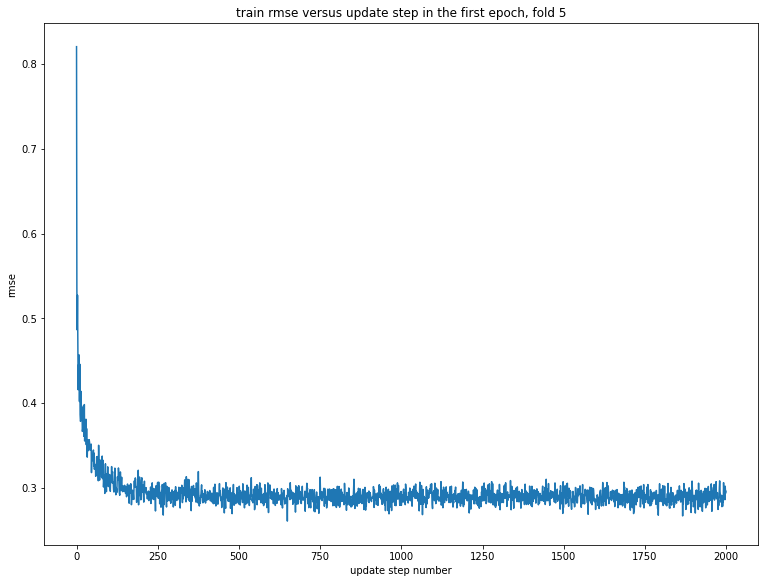

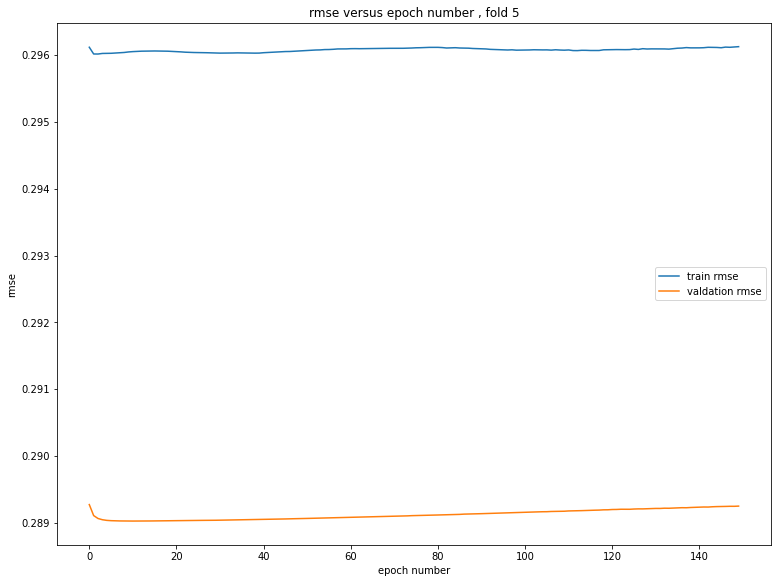

In [4]:
# the model is trained.
train_model(X, Y)

In [5]:
# Using the above graphics, the optimum number of epochs is determined. 
# The model is trained on the  whole training data, without separating 
# it into the training and validation parts. It is tested on the test data.

# initialization of the model to a random state.
# initialization of the weight matrix of the first hidden layer
rng = np.random.default_rng(seed=9348)
w_1 = rng.random(size=(d_in, d_1))+(-0.5)
# initialization of the bias matrix of the first hidden layer
b_1 = 0.1*np.ones(shape=(1, d_1))
# initialization of the weight matrix of the second hidden layer
rng = np.random.default_rng(seed=39048)
w_2 = rng.random(size=(d_1, d_2))+(-0.5)
# initialization of the bias matrix of the second hidden layer
b_2 = 0.1*np.ones(shape=(1, d_2))
# initialization of the weight matrix of the third hidden layer
rng = np.random.default_rng(seed=578402)
w_3 = rng.random(size=(d_2, d_out))+(-0.5)
# initialization of the bias matrix of the third hidden layer
b_3 = 0.1*np.ones(shape=(1, d_out))
# the number of update steps for each epoch
num_of_steps = X.shape[0] // n
loss_array = -np.ones((epochs, num_of_steps))
epoch_train_loss = -np.ones(epochs)
epoch_validation_loss = -np.ones(epochs)
    
# the optimum number of epochs has been determined using the graphs for training and validation rmse's.
optimum_epochs = 20

# the model is trained using the whole training data, without separating it into the training and validation parts.
for k in range(0, optimum_epochs):
    for i in range(0, num_of_steps):
        # the batches of input and output data are obtained.
        x = X[(i*n):((i+1)*n), :]
        y = Y[(i*n):((i+1)*n), :]

        # the output of the first hidden layer
        h_1 = np.matmul(x, w_1)+np.matmul(np.ones(shape=(n, 1)), b_1)
        # relu of h_1
        h_1_relu = np.maximum(h_1, 0)
        # the output of the second hidden layer
        h_2 = np.matmul(h_1_relu, w_2)+np.matmul(np.ones(shape=(n, 1)), b_2)
        # relu of h_2
        h_2_relu = np.maximum(h_2, 0)
        # predicted output
        y_pred = np.matmul(h_2_relu, w_3)+np.matmul(np.ones(shape=(n, 1)), b_3)
    
        # squared loss
        loss = np.sqrt(np.square(y_pred-y).mean())
        loss_array[k, i] = loss
    
        # first needed array
        array_needed_1 = 2.0*(y_pred-y)
        # gradient of the loss w.r.t. b_3
        grad_b_3 = array_needed_1.sum(axis=0)
    
        # gradient of the loss w.r.t. w_3
        grad_w_3 = np.matmul(h_2_relu.T, array_needed_1)
    
        # derivative of h_2_relu(x), 0 for negative x, 1 for non-negative x
        A = np.ones(shape=h_2.shape)
        the_filter = h_2 < 0
        A[the_filter] = 0
    
        # second needed array
        array_needed_2 = A*(np.matmul(array_needed_1, w_3.T))

        # gradient of the loss w.r.t. b_2
        grad_b_2 = array_needed_2.sum(axis=0)
            
        # gradient of the loss w.r.t. w_2
        grad_w_2 = np.matmul(h_1_relu.T, array_needed_2)
    
        # derivative of h_1_relu(x), 0 for negative x, 1 for non-negative x
        C = np.ones(shape=h_1.shape)
        the_filter = h_1 < 0
        C[the_filter] = 0
    
        # third needed array
        array_needed_3 = C*(np.matmul(array_needed_2, w_2.T))
    
        # gradient of the loss w.r.t. b_1
        grad_b_1 = array_needed_3.sum(axis=0)
    
        # gradient of the loss w.r.t. w_1
        grad_w_1 = np.matmul(x.T, array_needed_3)
    
        # gradient updates are applied to the parameters
        b_3 -= lr * grad_b_3
        w_3 -= lr * grad_w_3
        b_2 -= lr * grad_b_2
        w_2 -= lr * grad_w_2
        b_1 -= lr * grad_b_1
        w_1 -= lr * grad_w_1


# the output of the first hidden layer
h_1 = np.matmul(X_test, w_1)+np.matmul(np.ones(shape=(X_test.shape[0], 1)), b_1)
# relu of h_1
h_1_relu = np.maximum(h_1, 0)
# the output of the second hidden layer
h_2 = np.matmul(h_1_relu, w_2)+np.matmul(np.ones(shape=(X_test.shape[0], 1)), b_2)
# relu of h_2
h_2_relu = np.maximum(h_2, 0)
# predicted output
y_pred = np.matmul(h_2_relu, w_3)+np.matmul(np.ones(shape=(X_test.shape[0], 1)), b_3)

# the rmse for the test data is computed.
test_loss = np.sqrt(np.square(y_pred-Y_test).mean())
print('test rmse is', test_loss)

test rmse is 0.28876291560331574


In [6]:
# In this part, the input data and the output data are not random.
# There is a relation between them. The model fitted to this data
# is expected to be more successful than the one fitted to the random data.

# the original weight matrix of the first hidden layer
rng = np.random.default_rng(seed=296854)
w_1_actual = rng.random(size=(d_in, d_1))+(-0.5)
# the original bias matrix of the first hidden layer
b_1_actual = 0.1*np.ones(shape=(1, d_1))
# the original weight matrix of the second hidden layer
rng = np.random.default_rng(seed=4367)
w_2_actual = rng.random(size=(d_1, d_2))+(-0.5)
# the original bias matrix of the second hidden layer
b_2_actual = 0.1*np.ones(shape=(1, d_2))
# the original weight matrix of the third hidden layer
rng = np.random.default_rng(seed=47863)
w_3_actual = rng.random(size=(d_2, d_out))+(-0.5)
# the original bias matrix of the third hidden layer
b_3_actual = 0.1*np.ones(shape=(1, d_out))

# the output data is computed according to a non-random function.
h_1_actual = np.matmul(X_all, w_1_actual)+np.matmul(np.ones(shape=(N, 1)), b_1_actual)
h_1_relu_actual = np.maximum(h_1_actual, 0)
h_2_actual = np.matmul(h_1_relu_actual, w_2_actual)+np.matmul(np.ones(shape=(N, 1)), b_2_actual)
h_2_relu_actual = np.maximum(h_2_actual, 0)
Y_all = np.matmul(h_2_relu_actual, w_3_actual)+np.matmul(np.ones(shape=(N, 1)), b_3_actual)

# the data is separated into the training and test parts.
X, X_test, Y, Y_test =train_test_split(X_all, Y_all, test_size=train_test_split_ratio, random_state=3487)

fold: 1
fold: 2
fold: 3
fold: 4
fold: 5


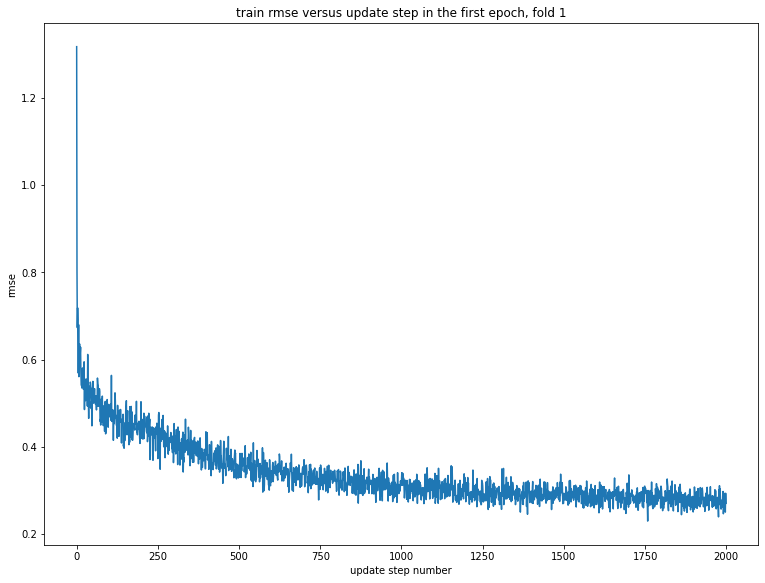

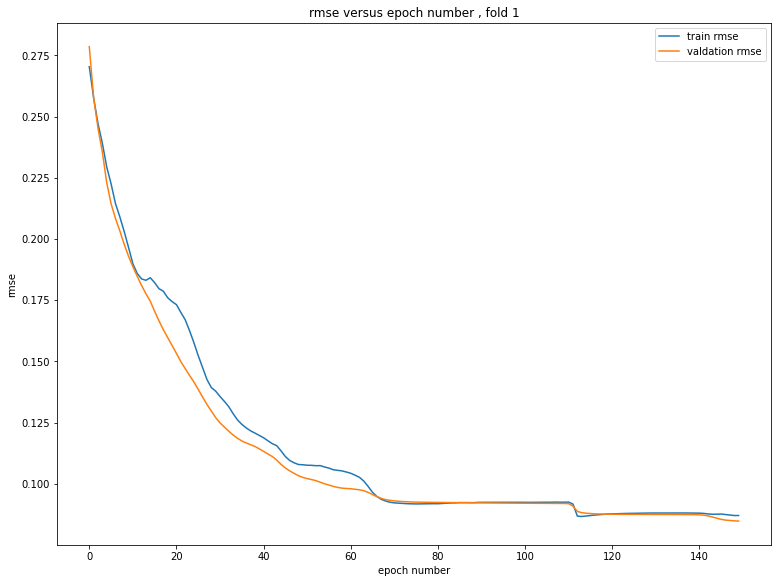

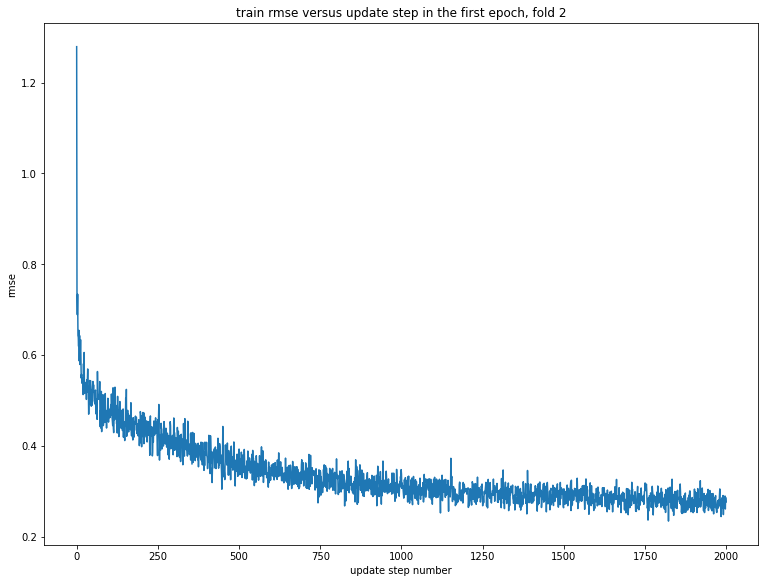

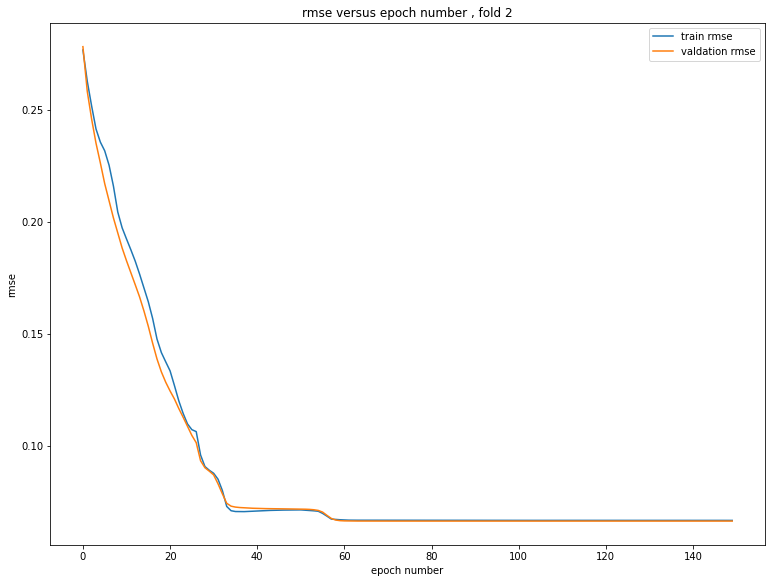

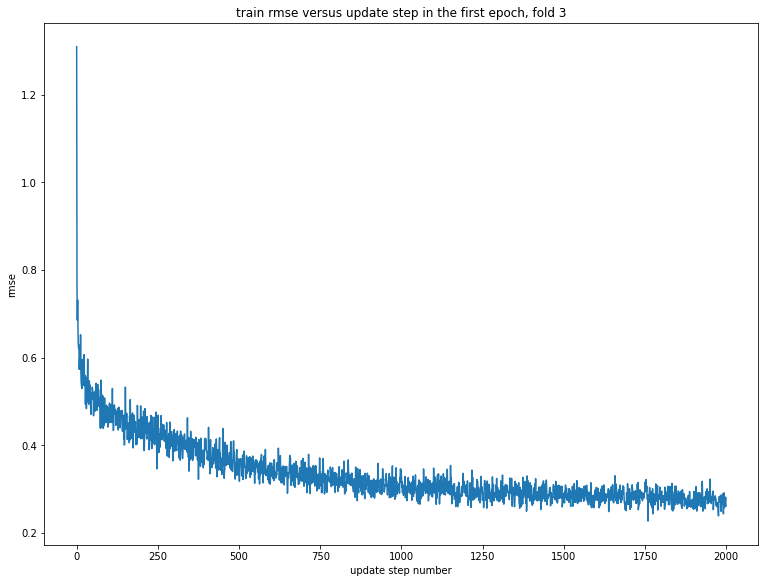

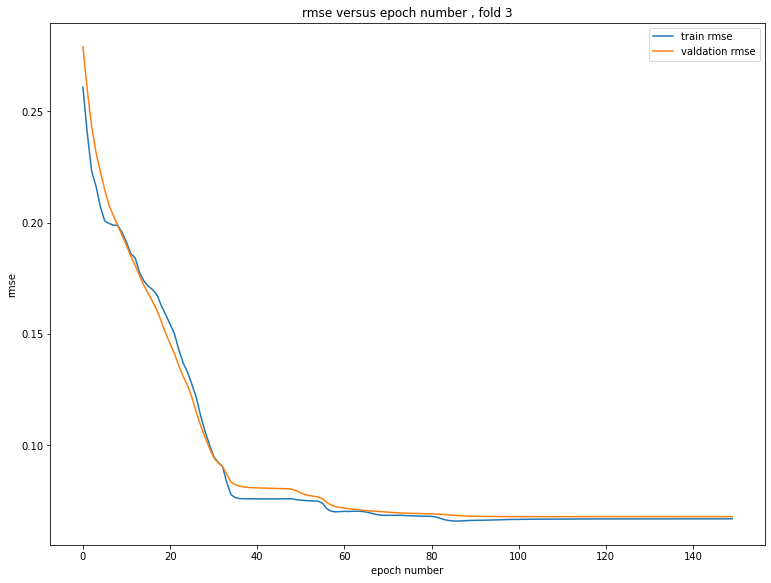

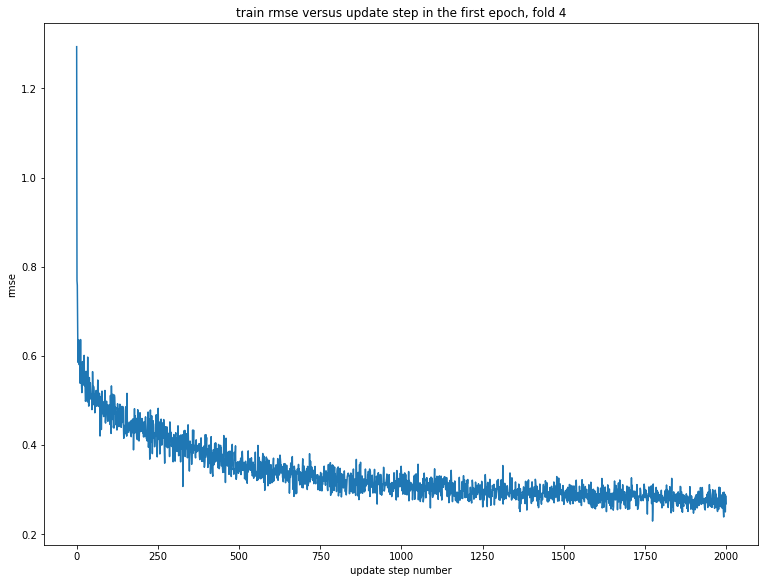

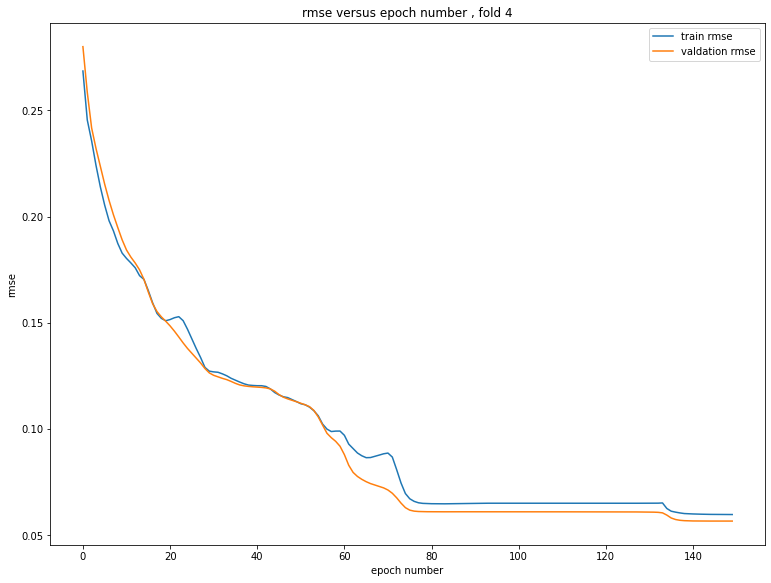

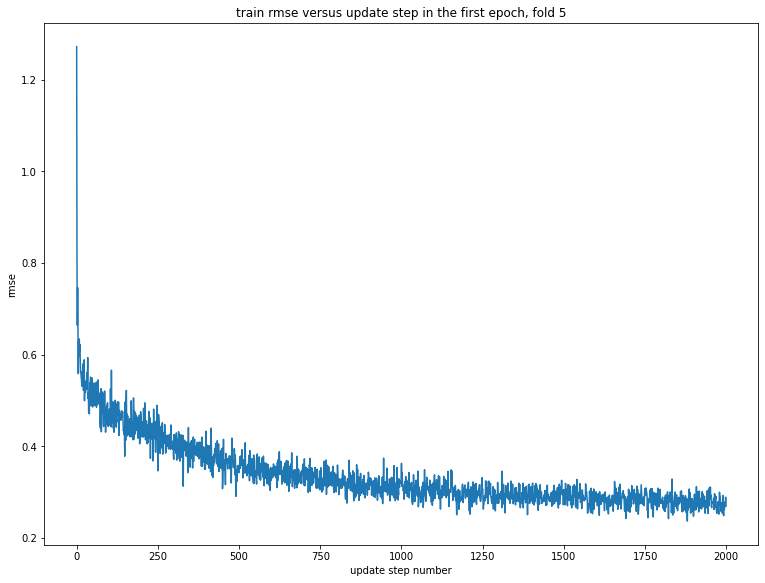

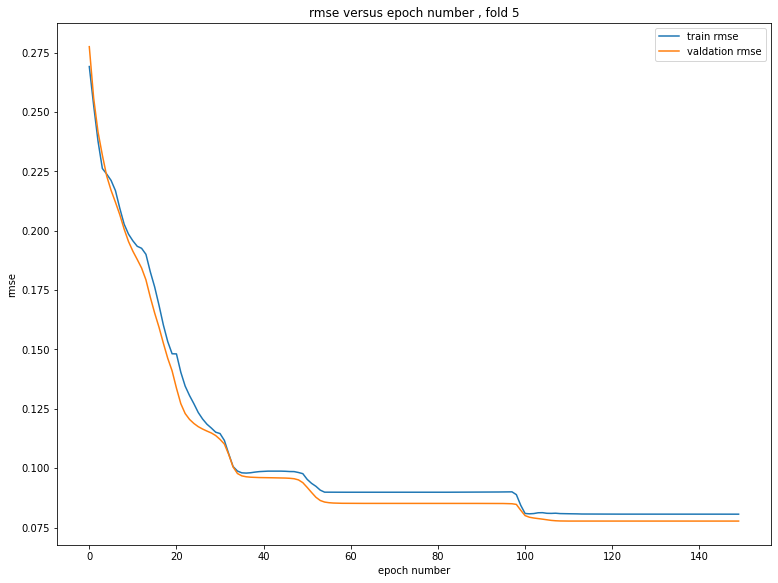

In [7]:
# the model is trained.
train_model(X, Y)

In [8]:
# Using the above graphics, the optimum number of epochs is determined. 
# The model is trained on the  whole training data, without separating 
# it into the training and validation parts. It is tested on the test data.

# initialization of the model to a random state.
# initialization of the weight matrix of the first hidden layer
rng = np.random.default_rng(seed=9348)
w_1 = rng.random(size=(d_in, d_1))+(-0.5)
# initialization of the bias matrix of the first hidden layer
b_1 = 0.1*np.ones(shape=(1, d_1))
# initialization of the weight matrix of the second hidden layer
rng = np.random.default_rng(seed=39048)
w_2 = rng.random(size=(d_1, d_2))+(-0.5)
# initialization of the bias matrix of the second hidden layer
b_2 = 0.1*np.ones(shape=(1, d_2))
# initialization of the weight matrix of the third hidden layer
rng = np.random.default_rng(seed=578402)
w_3 = rng.random(size=(d_2, d_out))+(-0.5)
# initialization of the bias matrix of the third hidden layer
b_3 = 0.1*np.ones(shape=(1, d_out))
# the number of update steps for each epoch
num_of_steps = X.shape[0] // n
# the arrays to keep the loss information
loss_array = -np.ones((epochs, num_of_steps))
epoch_train_loss = -np.ones(epochs)
epoch_validation_loss = -np.ones(epochs)
    
# from the above graphs, the optimum number of epochs has been determined.
optimum_epochs = 120

# the model is trained using the whole training data, without separating it into the training and validation parts.
for k in range(0, optimum_epochs):
    for i in range(0, num_of_steps):
        # the batches of input and output data are obtained.
        x = X[(i*n):((i+1)*n), :]
        y = Y[(i*n):((i+1)*n), :]
        # the output of the first hidden layer
        h_1 = np.matmul(x, w_1)+np.matmul(np.ones(shape=(n, 1)), b_1)
        # relu of h_1
        h_1_relu = np.maximum(h_1, 0)
        # the output of the second hidden layer
        h_2 = np.matmul(h_1_relu, w_2)+np.matmul(np.ones(shape=(n, 1)), b_2)
        # relu of h_2
        h_2_relu = np.maximum(h_2, 0)
        # predicted output
        y_pred = np.matmul(h_2_relu, w_3)+np.matmul(np.ones(shape=(n, 1)), b_3)
    
        # root mean squared loss
        loss = np.sqrt(np.square(y_pred-y).mean())
        loss_array[k, i] = loss
    
        # first needed array
        array_needed_1 = 2.0*(y_pred-y)
        # gradient of the loss w.r.t. b_3
        grad_b_3 = array_needed_1.sum(axis=0)
    
        # gradient of the loss w.r.t. w_3
        grad_w_3 = np.matmul(h_2_relu.T, array_needed_1)
    
        # derivative of h_2_relu(x), 0 for negative x, 1 for non-negative x
        A = np.ones(shape=h_2.shape)
        the_filter = h_2 < 0
        A[the_filter] = 0
    
        # second needed array
        array_needed_2 = A*(np.matmul(array_needed_1, w_3.T))

        # gradient of the loss w.r.t. b_2
        grad_b_2 = array_needed_2.sum(axis=0)
            
        # gradient of the loss w.r.t. w_2
        grad_w_2 = np.matmul(h_1_relu.T, array_needed_2)
    
        # derivative of h_1_relu(x), 0 for negative x, 1 for non-negative x
        C = np.ones(shape=h_1.shape)
        the_filter = h_1 < 0
        C[the_filter] = 0
    
        # third needed array
        array_needed_3 = C*(np.matmul(array_needed_2, w_2.T))
    
        # gradient of the loss w.r.t. b_1
        grad_b_1 = array_needed_3.sum(axis=0)
    
        # gradient of the loss w.r.t. w_1
        grad_w_1 = np.matmul(x.T, array_needed_3)
    
        # gradient updates are applied to the parameters
        b_3 -= lr * grad_b_3
        w_3 -= lr * grad_w_3
        b_2 -= lr * grad_b_2
        w_2 -= lr * grad_w_2
        b_1 -= lr * grad_b_1
        w_1 -= lr * grad_w_1


# the output of the first hidden layer
h_1 = np.matmul(X_test, w_1)+np.matmul(np.ones(shape=(X_test.shape[0], 1)), b_1)
# relu of h_1
h_1_relu = np.maximum(h_1, 0)
# the output of the second hidden layer
h_2 = np.matmul(h_1_relu, w_2)+np.matmul(np.ones(shape=(X_test.shape[0], 1)), b_2)
# relu of h_2
h_2_relu = np.maximum(h_2, 0)
# predicted output
y_pred = np.matmul(h_2_relu, w_3)+np.matmul(np.ones(shape=(X_test.shape[0], 1)), b_3)

# the rmse for the test data is obtained.
test_loss = np.sqrt(np.square(y_pred-Y_test).mean())
print('test rmse is', test_loss)

test rmse is 0.07435318640608177


When the test losses of the two models are compared, it is observed that the model fitted to a non-random input-output relationship is more succecssfıl than the one fitted to a random input-output relationship.